#### Content
* price price in US dollars ($326-$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
f=pd.read_csv("diamonds.csv",sep=",")
f.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
17729,17730,0.35,Very Good,H,VS1,62.6,58.0,614,4.49,4.52,2.82
33471,33472,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
10981,10982,1.11,Premium,I,SI1,60.6,59.0,4911,6.73,6.66,4.06
20043,20044,0.40,Ideal,H,SI2,62.6,55.0,625,4.73,4.76,2.97
51158,51159,0.72,Very Good,I,SI1,63.2,57.0,2345,5.71,5.75,3.62


In [4]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
f.shape

(53940, 11)

In [6]:
# Checking for null values

In [7]:
f.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
f.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
f.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
num=f.select_dtypes(["int64","float64"])
num.head(1)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43


In [11]:
cat=f.select_dtypes("object")
cat.head(1)

,cut,color,clarity
0,Ideal,E,SI2


In [12]:
# Handling the categorical data

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
for col in cat:
    le=LabelEncoder()
    f[col]=le.fit_transform(f[col])

In [15]:
f['size']=f["x"]*f["y"]*f["z"]

In [16]:
f.drop(['x','y','z'],axis=1,inplace=True)

In [17]:
f.sample(3)

,carat,cut,color,clarity,depth,table,price,size
18448,1.13,2,2,5,62.1,56.0,7504,185.179225
27239,2.52,1,3,3,63.7,59.0,17608,397.209216
24261,1.58,4,4,4,60.3,62.0,12483,259.359555


In [18]:
# check the skewness in the dataset
from scipy.stats import skew
for col in f.columns:
    print(col)
    print(skew(f[col]))
    print()

carat
1.1166148681277797

cut
-0.18743777174048054

color
0.1893606446449631

clarity
0.17491181351641524

depth
-0.08229173779627727

table
0.7968736878796518

price
1.6183502776053016

size
3.038661733832009



## Visualization

carat
1.1166148681277797


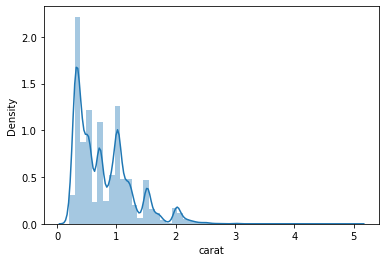

cut
-0.18743777174048054


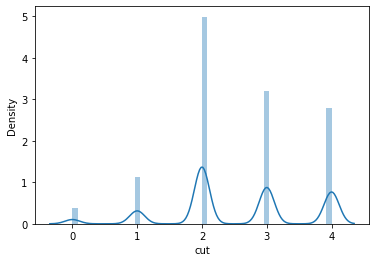

color
0.1893606446449631


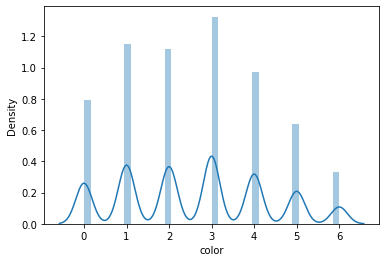

clarity
0.17491181351641524


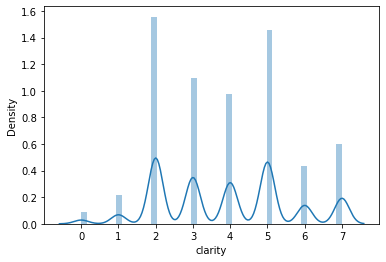

depth
-0.08229173779627727


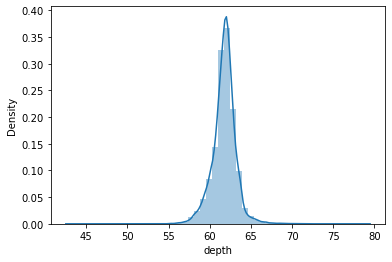

table
0.7968736878796518


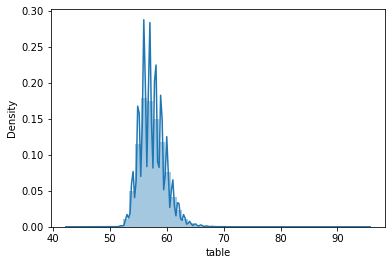

price
1.6183502776053016


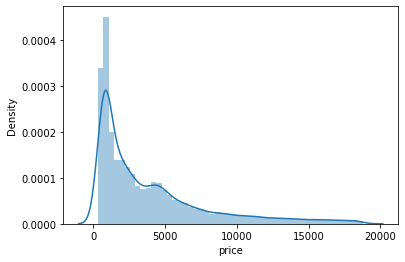

size
3.038661733832009


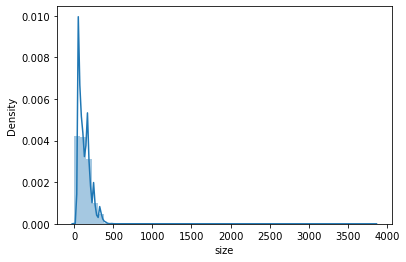

In [19]:
for col in f.columns:
    print(col)
    print(skew(f[col]))
    sns.distplot(f[col]);
    plt.show();

### Handling the skewness

In [20]:
f["size"]=np.sqrt(f["size"])
f["carat"]=np.sqrt(f["carat"])
f["table"]=np.sqrt(f["table"])

In [21]:
# checking the outliers in the data

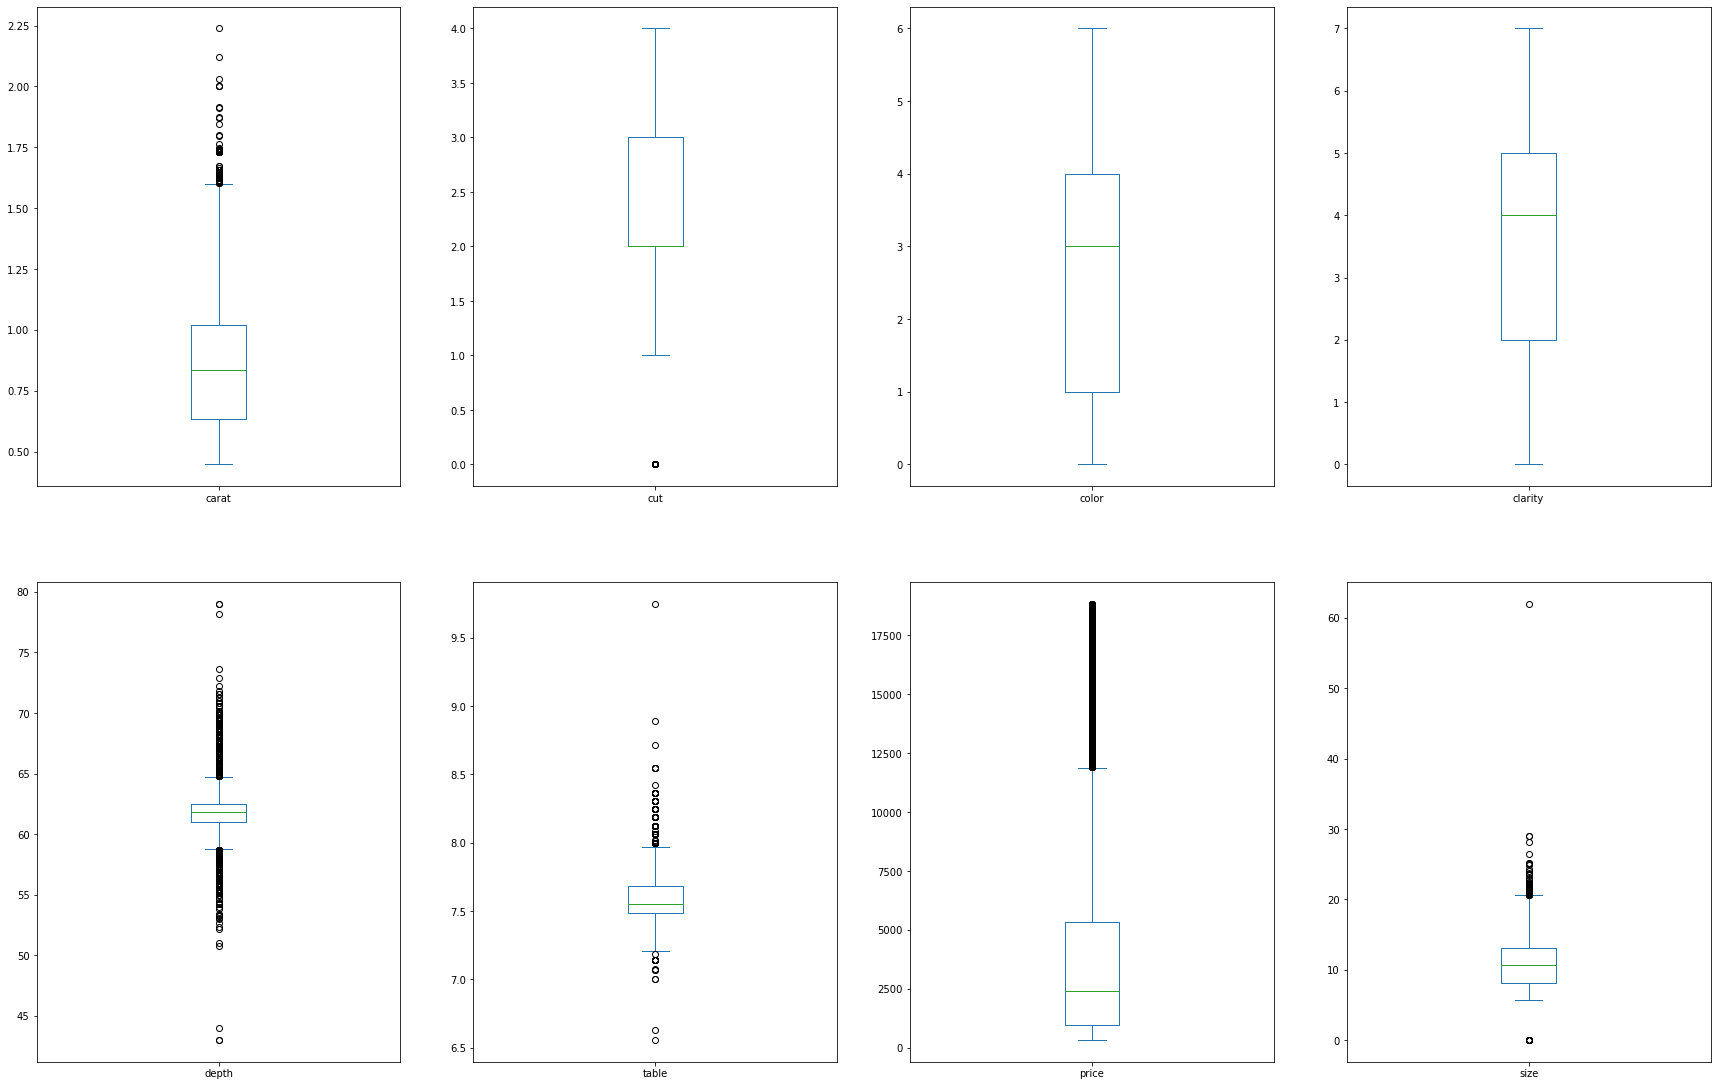

In [22]:
f.plot(kind='box', subplots=True, figsize=(30,30),layout=(3,4))
plt.show()

In [23]:
# scatter plot for all featrues & label

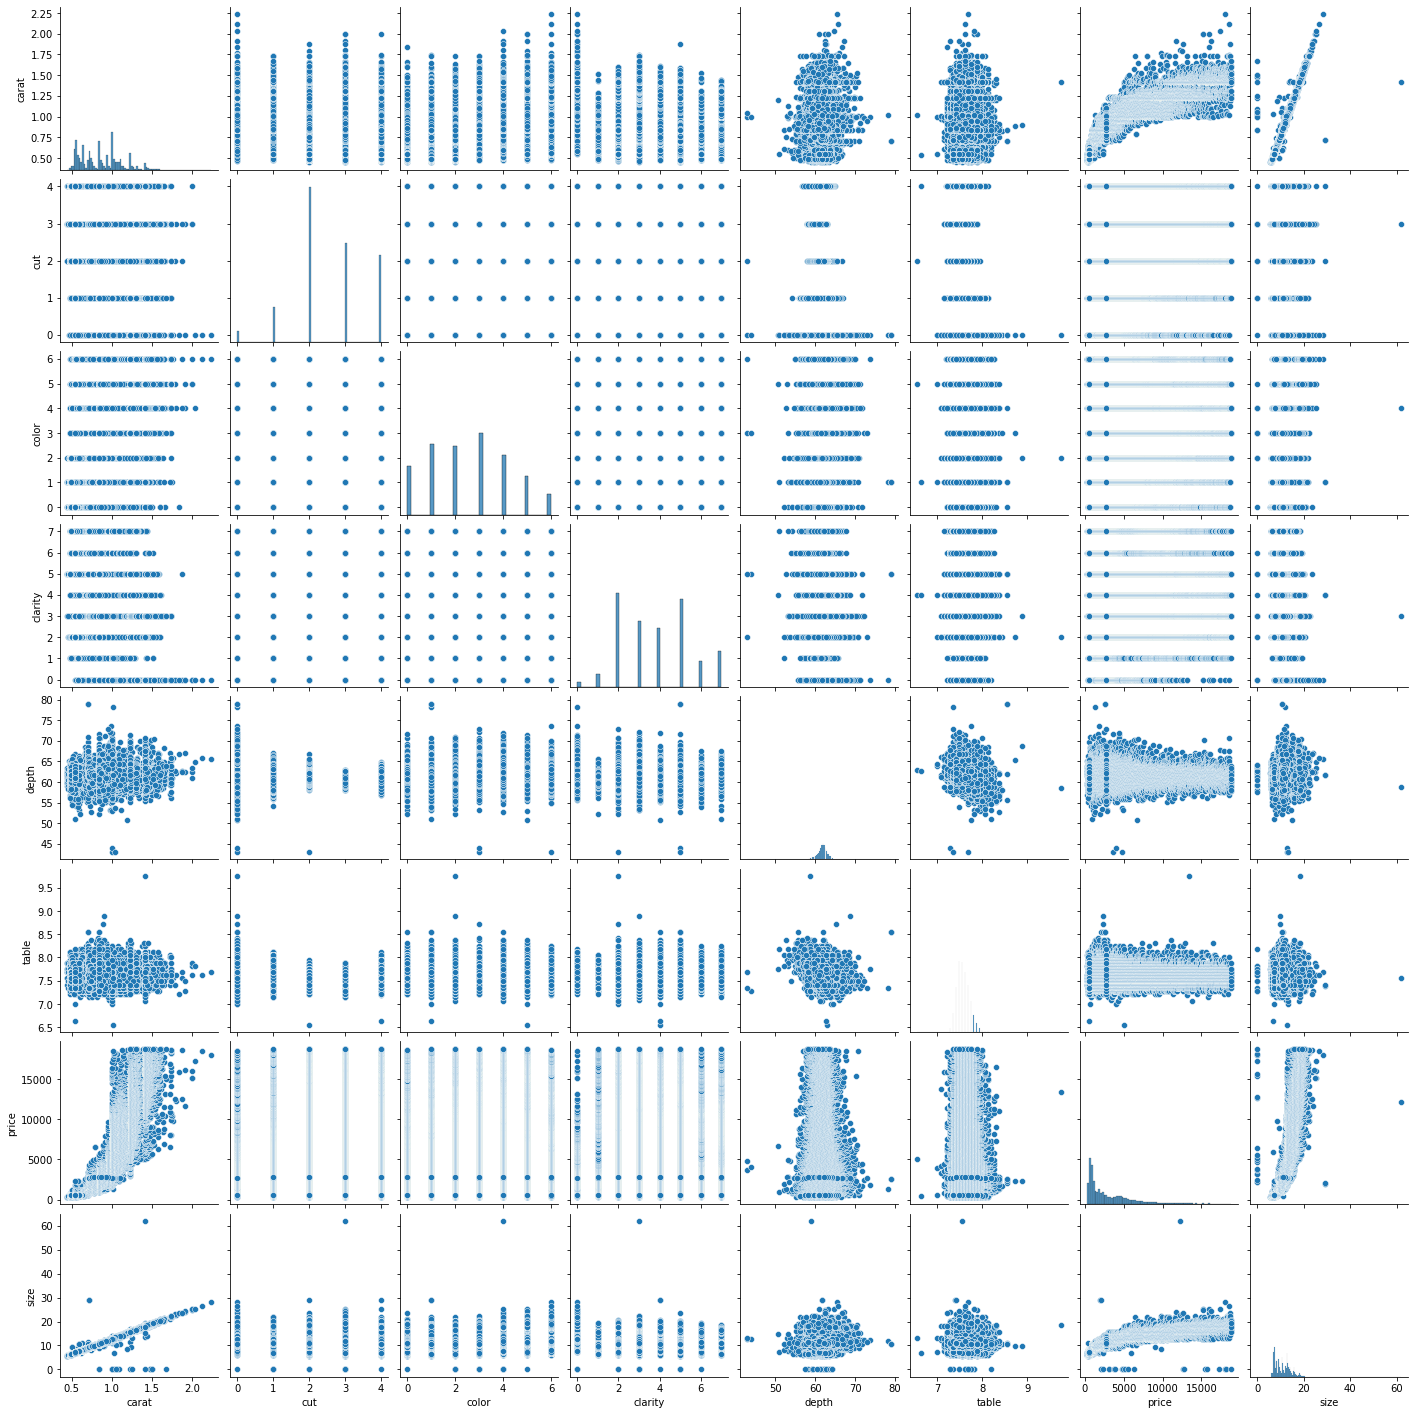

In [24]:
sns.pairplot(f,kind='scatter');

In [25]:
## checking for correlation

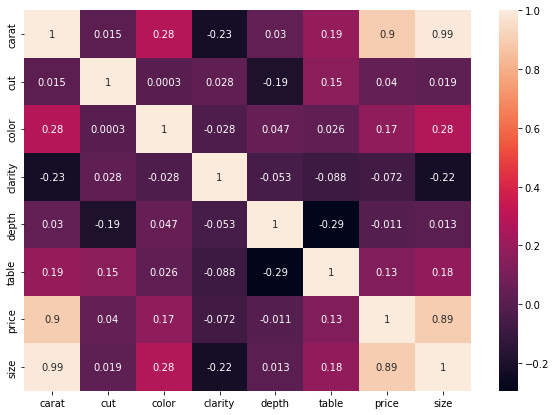

In [26]:
plt.figure(figsize=(10,7))
corr = f.corr()
sns.heatmap(corr,annot=True);

In [28]:
#Scatter plot

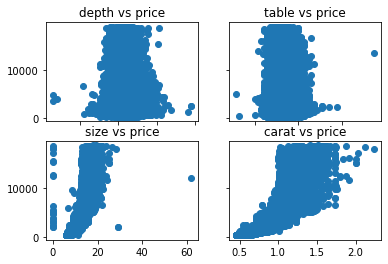

In [32]:
fig,ax=plt.subplots(2,2)
ax[0,0].scatter(f["depth"],f["price"])
ax[0,1].scatter(f["table"],f["price"])
ax[1,0].scatter(f["size"],f["price"])
ax[1,1].scatter(f["carat"],f["price"])
ax[0, 0].set_title('depth vs price')
ax[0, 1].set_title('table vs price')
ax[1, 0].set_title('size vs price')
ax[1, 1].set_title('carat vs price')
for ax in ax.flat:
    ax.label_outer()

### Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [34]:
X=f["carat"].values.reshape(-1,1)
y=f.price

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)
print("r2_score_train:",r2_score(y_train,y_train_pred))
print("r2_score_test:",r2_score(y_test,y_test_pred))

r2_score_train: 0.8073767921236659
r2_score_test: 0.8088236140838102


In [36]:
#Lasso Regulization
from sklearn.linear_model import Lasso
lso=Lasso()
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.8073758128614033
lasso_test_score: 0.8088174695362224


In [37]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.8073766866709319
Ridge_test_score: 0.80882181274747


In [38]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet()
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.1729713274817104
ENet_train_score: 0.17280778033940802


In [39]:
#KFold for Ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(ridge,X_train,y_train,cv=fold)
score_test=cross_val_score(ridge,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.80387979 0.81117337 0.81004603 0.80367957 0.80763937]
[0.81103667 0.80292178 0.8084322  0.80166173 0.81791457]

acc_score_train : 0.807283623644857
acc_score_test : 0.8083933882819603


**In simple linear regression we get the 0.80 r2_score and after cv for ridge we get the same score 0.80**

### Multipl Linear Regression

In [40]:
X=f.drop("price",axis=1)
y=f.price

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)
print("r2_score_train:",r2_score(y_train,y_train_pred))
print("r2_score_test:",r2_score(y_test,y_test_pred))

r2_score_train: 0.8371310065578367
r2_score_test: 0.8372063016732683


In [42]:
#KFold for Multiple Linear
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)
score_test=cross_val_score(lr,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.83403637 0.83918154 0.83862897 0.83513003 0.837866  ]
[0.83685018 0.83336141 0.83562917 0.82931595 0.84662312]

acc_score_train : 0.8369685794385715
acc_score_test : 0.8363559659337119


In [43]:
#Lasso Regulization
from sklearn.linear_model import Lasso
lso=Lasso()
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.8370718595753704
lasso_test_score: 0.8372804728307


In [44]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.8371241183322325
Ridge_test_score: 0.8372275356167945


In [45]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet()
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.8189691703420208
ENet_train_score: 0.8264391052023659


In [46]:
#KFold for Ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(ridge,X_train,y_train,cv=fold)
score_test=cross_val_score(ridge,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.83399242 0.83919567 0.83867576 0.83516516 0.83767794]
[0.83694018 0.83384883 0.83597064 0.82648403 0.8465726 ]

acc_score_train : 0.8369413893859468
acc_score_test : 0.83596325693129


**In Multiple linear regression we get the 0.83 r2_score and after cv for ridge we get the same score 0.83**

In [47]:
meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', meanAbErr);
print('Mean Square Error:', meanSqErr);
print('Root Mean Square Error:', rootMeanSqErr);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Absolute Error: 1203.7477544734534
Mean Square Error: 2580553.6677713445
Root Mean Square Error: 1606.4101804244594


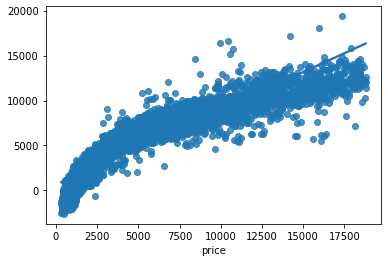

In [48]:
sns.regplot(y_test,y_test_pred);

**From abobe plot we can see that there is close pridiction so we can say that our model is good.**